In [1]:
import math

class Node:
    def __init__(self, state, move=None):
        self.state = state
        self.move = move

    def is_terminal_node(self):
        return self.state.is_goal()

    def evaluate(self):
        return self.state.heuristic_estimate()

    def generate_children(self):
        return [Node(self.state.perform_move(move), move) for move in self.state.available_moves()]

class GridState:
    def __init__(self, x, y, grid, goal_x, goal_y):
        self.x = x
        self.y = y
        self.grid = grid
        self.goal_x = goal_x
        self.goal_y = goal_y

    def is_goal(self):
        return self.x == self.goal_x and self.y == self.goal_y

    def heuristic_estimate(self):
        return abs(self.x - self.goal_x) + abs(self.y - self.goal_y)

    def perform_move(self, move):
        new_x, new_y = move
        if 0 <= new_x < len(self.grid) and 0 <= new_y < len(self.grid[0]) and self.grid[new_x][new_y] != 1:
            return GridState(new_x, new_y, self.grid, self.goal_x, self.goal_y)
        else:
            return self

    def available_moves(self):
        moves = [(self.x + 1, self.y), (self.x - 1, self.y), (self.x, self.y + 1), (self.x, self.y - 1)]
        return [(x, y) for x, y in moves]

def alpha_beta_search(node, depth, alpha, beta, is_maximizing_player):
    if depth == 0 or node.is_terminal_node():
        return node.evaluate(), None

    if is_maximizing_player:
        max_eval = -math.inf
        best_move = None
        for child in node.generate_children():
            child_eval, _ = alpha_beta_search(child, depth - 1, alpha, beta, False)
            max_eval = max(max_eval, child_eval)
            alpha = max(alpha, max_eval)
            if beta <= alpha:
                break
            if max_eval == child_eval:
                best_move = child.move
        return max_eval, best_move
    else:
        min_eval = math.inf
        best_move = None
        for child in node.generate_children():
            child_eval, _ = alpha_beta_search(child, depth - 1, alpha, beta, True)
            min_eval = min(min_eval, child_eval)
            beta = min(beta, min_eval)
            if beta <= alpha:
                break
            if min_eval == child_eval:
                best_move = child.move
        return min_eval, best_move

def visualize_path(grid, start, goal, best_move):
    x, y = start
    grid[x][y] = 2  # Mark the start point with 2
    
    while (x, y) != goal:
        x, y = best_move
        # Check if the move is within the grid boundaries
        if 0 <= x < len(grid) and 0 <= y < len(grid[0]):
            grid[x][y] = 2  # Mark the path with 2
        else:
            print("Invalid move detected. Path visualization aborted.")
            break
        
        # Perform the next search step
        best_eval, best_move = alpha_beta_search(Node(GridState(x, y, grid, goal[0], goal[1])), depth=3, alpha=-math.inf, beta=math.inf, is_maximizing_player=True)
        # Check if the new move is within the grid boundaries
        if best_move and (0 <= best_move[0] < len(grid) and 0 <= best_move[1] < len(grid[0])):
            continue
        else:
            print("Invalid move detected. Path visualization aborted.")
            break

    # Mark the goal with 2 if it is within the grid boundaries
    if 0 <= x < len(grid) and 0 <= y < len(grid[0]):
        grid[x][y] = 2
    else:
        print("Invalid goal position. Path visualization aborted.")


# Provided input
grid = [
    [0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0]
]

start_position = (0, 0)
goal_position = (4, 4)

initial_state = GridState(start_position[0], start_position[1], grid, goal_position[0], goal_position[1])
result_eval, best_path = alpha_beta_search(Node(initial_state), depth=3, alpha=-math.inf, beta=math.inf, is_maximizing_player=True)

# Output the grid with path
if best_path is not None:
    visualize_path(grid, start_position, goal_position, best_path)
    print("Grid with Path:")
    for row in grid:
        print(row)
else:
    print("No valid path found.")

print("\nResult Evaluation:", result_eval)


Invalid move detected. Path visualization aborted.
Invalid goal position. Path visualization aborted.
Grid with Path:
[2, 0, 0, 0, 0]
[0, 1, 1, 0, 0]
[0, 0, 0, 1, 0]
[0, 1, 0, 0, 0]
[0, 0, 0, 0, 0]

Result Evaluation: 8


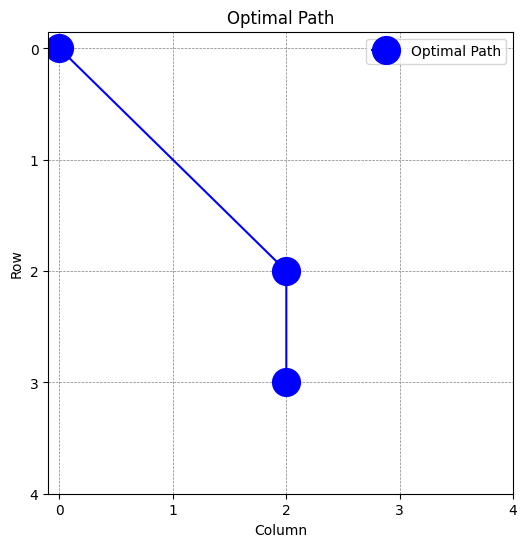

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Output grid with path
grid = [
    [2, 0, 0, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 2, 1, 0],
    [0, 1, 2, 0, 0],
    [0, 0, 0, 0, 0]
]

# Extract coordinates of the path
path_x, path_y = [], []
for i in range(len(grid)):
    for j in range(len(grid[0])):
        if grid[i][j] == 2:
            path_x.append(i)
            path_y.append(j)

# Plot the path
plt.figure(figsize=(6, 6))
plt.plot(path_y, path_x, marker='o', color='b', markersize=20, label='Optimal Path')
plt.xticks(np.arange(0, len(grid[0]), 1))
plt.yticks(np.arange(0, len(grid), 1))
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.gca().invert_yaxis()  # Invert y-axis to match the grid
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Optimal Path')
plt.legend()
plt.show()
